In [ ]:
# Activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages('BayesFactor')
library(tidyverse)
library(ggplot2)
library(BayesFactor)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘mvtnorm’, ‘gtools’, ‘MatrixModels’, ‘Rcpp’, ‘hypergeo’, ‘RcppEigen’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/elliptic_1.4-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1079005 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

### Câu a

In [ ]:
%%R
x <- c(10, 10, 20, 30, 30, 40, 40, 40)
y <- c(64, 63, 72, 77, 78, 78, 74, 75)

In [ ]:
%%R
linear <- lm(formula = y ~ x)

In [ ]:
%%R
summary(linear)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6522 -2.6033 -0.6196  2.6359  4.3696 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 61.56522    2.93116  21.004 7.59e-07 ***
x            0.40217    0.09771   4.116  0.00624 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.313 on 6 degrees of freedom
Multiple R-squared:  0.7385,	Adjusted R-squared:  0.6949 
F-statistic: 16.94 on 1 and 6 DF,  p-value: 0.006243



Phương trình hồi quy: y^ = 61.6 + 0.4*x

In [ ]:
%%R
anova(linear)

Analysis of Variance Table

Response: y
          Df Sum Sq Mean Sq F value   Pr(>F)   
x          1 186.00 186.005  16.943 0.006243 **
Residuals  6  65.87  10.978                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


F=16.94 và p-value=0.006<0.05 → bác bỏ H0 (kết luận x và y có quan hệ)

### Câu b

In [ ]:
%%R
from rpy2.robjects.packages import importr
# install.packages("alr3")
# library(alr3)
utils = importr('utils')
utils.install_packages('alr3')
# pureErrorAnova(linear)

RParsingError: ignored

### Câu c

In [ ]:
%%R
lines(x,pre[1:8],col='black',lwd=2)

R[write to console]: Error in xy.coords(x, y) : object 'pre' not found




Error in xy.coords(x, y) : object 'pre' not found


RInterpreterError: ignored

In [ ]:
%%R
quad <- lm(formula = y ~ x + I(x^2))

In [ ]:
%%R
summary(quad)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
       1        2        3        4        5        6        7        8 
 0.65116 -0.34884 -0.90698 -0.04651  0.95349  2.23256 -1.76744 -0.76744 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 48.372093   2.946063  16.419 1.53e-05 ***
x            1.768605   0.276734   6.391  0.00139 ** 
I(x^2)      -0.027093   0.005418  -5.000  0.00410 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.482 on 5 degrees of freedom
Multiple R-squared:  0.9564,	Adjusted R-squared:  0.939 
F-statistic: 54.87 on 2 and 5 DF,  p-value: 0.0003965



In [ ]:
%%R
anova(quad)

Analysis of Variance Table

Response: y
          Df  Sum Sq Mean Sq F value   Pr(>F)    
x          1 186.005 186.005  84.727 0.000254 ***
I(x^2)     1  54.893  54.893  25.004 0.004103 ** 
Residuals  5  10.977   2.195                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


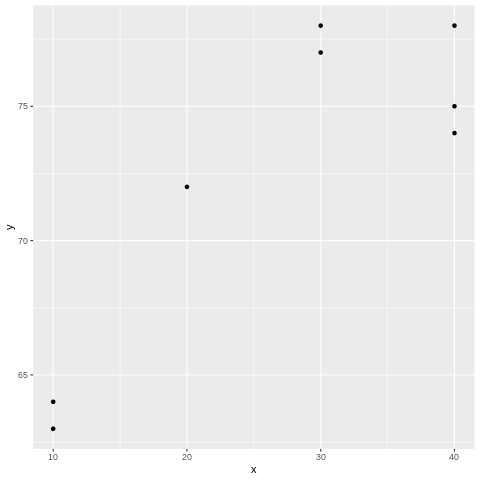

In [ ]:
%%R
df <- data.frame(x,y)
ggplot(df, aes(x=x,y=y)) + geom_point()